In [ ]:
# trial history modulation 

In [1]:
%load_ext autoreload
%autoreload 2
import tensortools_old as tt
import flow
import pool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from cascade import paths
from cascade import utils
import cascade as cas
from flow.misc import regression
from copy import deepcopy
import seaborn as sns
import tensorflow
from sklearn.model_selection import KFold
from statsmodels.distributions.empirical_distribution import ECDF
import networkx as nx
import scipy as sp
import matplotlib as mpl
import warnings

# trial history modulation on stages of learning

In [16]:
# mice = ['OA27']
mice=['OA27', 'OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226', 'CC175', 'AS57', 'CB173', 'AS47', 'AS41', 'AS23', 'AS20', 'OA38']
words=['bookmarks', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible',
       'horrible', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible']
# mice = ['OA26', 'VF226', 'CC175', 'AS57', 'CB173', 'AS47', 'AS41', 'AS23', 'OA38']
# words = ['horrible']*len(mice)
# mice=['OA27', 'OA26', 'OA67', 'VF226', 'OA32', 'OA34', 'OA36']
# words=['bookmarks', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible', 'horrible']
# mice=['OA32', 'OA34', 'OA36']
rank_num = 18
# meta_df_list = []
# y_list = []
for m, wi, in zip(mice, words):
    
    # breathing room
    print(' \n')
    
    # get X and y inputs for GLM
#     pars = cas.psytrack.train_factor.default_pars
    psy1_df, meta1_df, fac1_df, _ = cas.psytrack.train_factor.sync_tca_pillow(
        m, word=wi, nan_thresh=0.95, group_by='all3', rank_num=rank_num) # **pars)
    
    # drop ['prev_choice', 'prev_punish', 'prev_reward'] from psy1 so it can be redefined
    psy1_df = psy1_df.drop(columns=['prev_choice', 'prev_punish', 'prev_reward'])
    
    meta1_df = cas.utils.add_10stages_to_meta(meta1_df, simple=False)
                    
    new_meta_df1, p_cols, i_cols, cs_cols = cas.glm.simpler_trial_history_columns_df(m, meta1_df)

    new_meta_df1 = cas.glm._add_hmm_to_design_mat(new_meta_df1, meta1_df)
    
    # start design matrix
    design_thX = pd.concat([
        new_meta_df1.loc[:, i_cols],
        new_meta_df1.loc[:, p_cols],
#                           new_meta_df1.loc[:, cs_cols],
#                           new_meta_df1.loc[:, ['choice', 'reward']],
        meta1_df.loc[:, ['parsed_stage', 'parsed_10stage']],
        new_meta_df1.loc[:, ['hmm_engaged']],
        ], axis=1)
    
    y_list.append(fac1_df)
    meta_df_list.append(design_thX)
    
    

 

Saved PsyTracker found, loading: S:\twophoton_analysis\Data\output\psytrack\OA26\caused\OA26_caused_adobe.psy
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Recalcing pool.calc.psytrack.dprime: OA26  
 

Saved PsyTracker found, loading: S:\twophoton_analysis\Data\output\psytrack\VF226\caused\VF226_caused_capability.psy
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Recalcing pool.calc.psytrack.dprime: VF226  
 

Saved PsyTracker found, loading: S:\twophoton_analysis\Data\output\psytrack\CC175\caused\CC175_caused_dear.psy
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Recalcing pool.calc.psytrack.dprime: CC175  
 

Saved PsyTracker found, loading: S:\twophoton_analysis\Data\output\psytrack\AS57\caused\AS57_caused_jason

KeyError: 'plus'

5

In [11]:
m

'OA26'

In [426]:
meti.head()

initial_plus  initial_minus  initial_neutral  \
mouse date     run trial_idx                                                 
OA36  170817.0 2   5                   0.0            1.0              0.0   
                   6                   0.0            1.0              0.0   
                   7                   1.0            0.0              0.0   
                   8                   1.0            0.0              0.0   
                   9                   0.0            0.0              1.0   

                              prev_same_init_plus  prev_diff_init_plus  \
mouse date     run trial_idx                                             
OA36  170817.0 2   5                          0.0                  0.0   
                   6                          0.0                  0.0   
                   7                          0.0                  1.0   
                   8                          1.0                  0.0   
                   9                          0.0                  0.0   

                              prev_same_init_minus  prev_diff_init_minus  \
mouse date     run trial_idx                                               
OA36  170817.0 2   5                           0.0                   0.0   
                   6                           1.0                   0.0   
                   7                           0.0                   0.0   
                   8                           0.0                   0.0   
                   9                           0.0                   0.0   

                              prev_same_init_neutral  prev_diff_init_neutral  \
mouse date     run trial_idx                                                   
OA36  170817.0 2   5                             0.0                     0.0   
                   6                             0.0                     0.0   
                   7                             0.0                     0.0   
                   8                             0.0                     0.0   
                   9                             0.0                     1.0   

                                 parsed_stage        parsed_10stage  \
mouse date     run trial_idx                                          
OA36  170817.0 2   5          low_dp learning  late low_dp learning   
                   6          low_dp learning  late low_dp learning   
                   7          low_dp learning  late low_dp learning   
                   8          low_dp learning  late low_dp learning   
                   9          low_dp learning  late low_dp learning   

                              hmm_engaged  
mouse date     run trial_idx               
OA36  170817.0 2   5                  1.0  
                   6                  1.0  
                   7                  1.0  
                   8                  1.0  
                   9                  1.0

In [464]:
th_mod_list = []
cues = ['plus', 'minus', 'neutral']
stage_type = 'parsed_stage'
for meti, faci, in zip(meta_df_list, y_list):
    
    # mouse
    mi = meti.reset_index()['mouse'].unique()[0]
    
    # reindex so you have 0.5 dates at reversal in trial factor df
    faci = faci.reindex(meti.index)
    
    # get the maximum amplitude across all time for each cue
    max_amp_list = []
    for ori2 in cues:
        oboo2 = meti['initial_{}'.format(ori2)].gt(0)
        max_amp_list.append(faci.loc[oboo2, :].mean(axis=0).values)
    max_amp = np.vstack(max_amp_list)
    max_ind = np.argmax(max_amp, axis=0)
    max_cue = [cues[s] for s in max_ind]

    for ori in cues:
        same_bool = meti['prev_same_init_{}'.format(ori)].gt(0)
        diff_bool = meti['prev_diff_init_{}'.format(ori)].gt(0)
        # tuning vector
        boolp = meti['initial_{}'.format('plus')].gt(0)
        boolm = meti['initial_{}'.format('minus')].gt(0)
        booln = meti['initial_{}'.format('neutral')].gt(0)
        for stagi in meti[stage_type].unique():
            stag_bool = meti[stage_type].isin([stagi])
            same_val = faci.loc[(stag_bool & same_bool), :].mean(axis=0)
            diff_val = faci.loc[(stag_bool & diff_bool), :].mean(axis=0)
            total_val = faci.loc[stag_bool & (same_bool | diff_bool), :].mean(axis=0)
            th_mod = (diff_val - same_val).divide(diff_val + same_val)
            
            # tuning vector
            p_val = faci.loc[stag_bool & boolp, :].mean(axis=0)
            m_val = faci.loc[stag_bool & boolm, :].mean(axis=0)
            n_val = faci.loc[stag_bool & booln, :].mean(axis=0)
            tuning = total_val/(p_val + m_val + n_val)
            FC_bias = p_val/(p_val + m_val + n_val)
            QC_bias = m_val/(p_val + m_val + n_val)
            NC_bias = n_val/(p_val + m_val + n_val)
            
            data = {'mouse': [mi]*len(th_mod),
                    'component': np.arange(1, len(th_mod)+1),
                    'cue': ['initial_{}'.format(ori)]*len(th_mod),
                    'best_cue': [ori==s for s in max_cue],
                    'stage': [stagi]*len(th_mod),
                    'th_mod': th_mod,
                    'prev_same_amplitude': same_val,
                    'prev_diff_amplitude': diff_val,
                    'total_amplitude': total_val,
                    'tuning': tuning,
                    'fc_bias': FC_bias,
                    'nc_bias': NC_bias,
                    'qc_bias': QC_bias,
                     }
            mini_df = pd.DataFrame(data=data).set_index(['mouse', 'component'])
            th_mod_list.append(mini_df)
total_th_df = pd.concat(th_mod_list, axis=0)

In [349]:
y_list[1].lt(0).sum()

factor_1     0
factor_2     0
factor_3     0
factor_4     0
factor_5     0
factor_6     0
factor_7     0
factor_8     0
factor_9     0
factor_10    0
factor_11    0
factor_12    0
factor_13    0
factor_14    0
factor_15    0
factor_16    0
factor_17    0
factor_18    0
dtype: int64

In [283]:
total_th_df.head()

cue  best_cue        stage    th_mod  \
mouse component                                                  
OA27  1          initial_plus     False  early naive  0.650635   
      2          initial_plus      True  early naive  0.418676   
      3          initial_plus      True  early naive  0.250462   
      4          initial_plus     False  early naive  0.131204   
      5          initial_plus      True  early naive -0.033502   

                 prev_same_amplitude  prev_diff_amplitude  total_amplitude  
mouse component                                                             
OA27  1                     0.003995             0.018874         0.031307  
      2                     0.054671             0.133420         0.108619  
      3                     0.005922             0.009879         0.027995  
      4                     0.086941             0.113201         0.098882  
      5                     0.469437             0.439003         0.180666

In [ ]:
# subtract out one epic and tehn replot, may make error bars tighter. 

# heatmap os stages of 

# temp comps sorted by simple trial history. 

# add tuning to heatmaps. how tuned is it to the cue that we are 

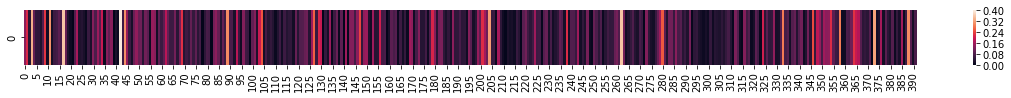

In [140]:
plt.figure(figsize=(20, 1))
sns.heatmap(best_cue_th_df['th_mod'].T[None, :])

In [162]:
test.columns

MultiIndex(levels=[['th_mod'], ['high_dp learning', 'high_dp reversal1', 'low_dp learning', 'low_dp reversal1', 'naive']],
           codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'stage'])

stage                               naive  low_dp learning  high_dp learning  \
mouse component cue                                                            
OA26  1         initial_neutral -0.033692         0.256517         -0.003394   
      2         initial_neutral  0.031090         0.021565          0.010893   
      3         initial_plus    -0.051658        -0.033689          0.040051   
      4         initial_plus     0.103211         0.118565          0.065451   
      5         initial_plus    -0.100011         0.045103         -0.024675   

stage                            low_dp reversal1  high_dp reversal1  
mouse component cue                                                   
OA26  1         initial_neutral          0.063914           0.105343  
      2         initial_neutral         -0.038219           0.041686  
      3         initial_plus             0.102242           0.002444  
      4         initial_plus             0.055529           0.048665  
      5         initial_plus             0.098100           0.076506

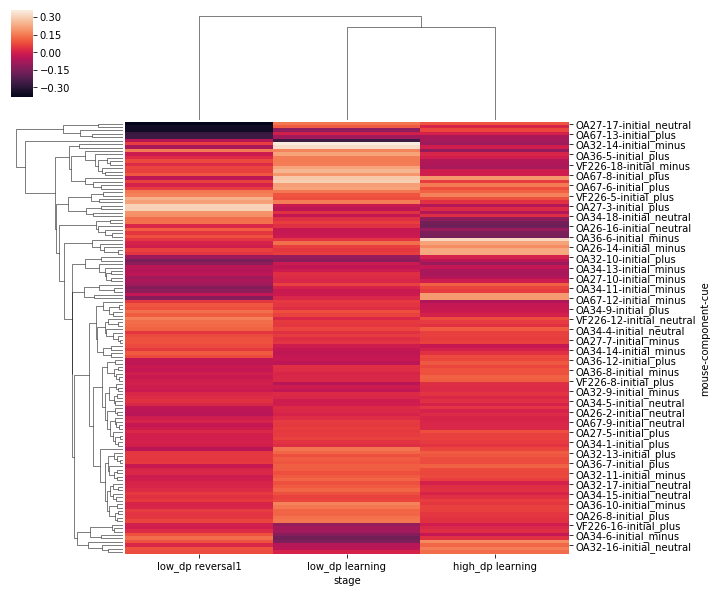

In [172]:
best_cue_th_df = total_th_df.loc[total_th_df['best_cue'], :]
test = (best_cue_th_df
 .drop(columns=['best_cue', 'total_amplitude', 'prev_same_amplitude', 'prev_diff_amplitude'])
 .set_index(['cue', 'stage'], append=True)
 .pivot_table(index=['mouse', 'component', 'cue'], columns=['stage']))
col_order = best_cue_th_df['stage'].unique()
test.columns = test.columns.droplevel()
test = test.loc[:, col_order] #.sort_values(by=['high_dp learning', 'high_dp reversal1'])

sns.clustermap(test.loc[:, ['low_dp learning', 'high_dp learning', 'low_dp reversal1']])
# sns.heatmap(test)                  
test.head()                   

In [143]:
best_cue_th_df['th_mod'].isna().sum()

0

Mice hashed: compilation
cascade.paths: Assuming default pars: cs: '', warp: '', trace_type: zscore_day


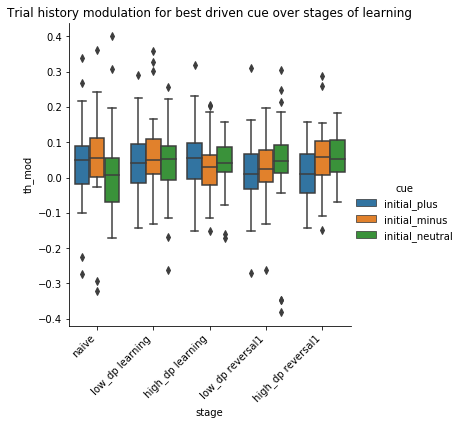

In [229]:
best_cue_th_df = total_th_df.loc[total_th_df['best_cue'], :]
# best_cue_th_df = total_th_df.loc[total_th_df['best_cue'] & total_th_df['th_mod'].gt(0), :]

sns.catplot(x='stage', y='th_mod', hue='cue', data=best_cue_th_df.reset_index(), kind='box')
plt.xticks(rotation=45, ha='right')
plt.title('Trial history modulation for best driven cue over stages of learning')

save_folder = cas.paths.save_dir_groupmouse(
        mice,
        'trial history modulation from compoenents',
        method='ncp_hals',
        nan_thresh=0.85,
        score_threshold=0.95,
        pars=None,
        words=words,
        rank_num=rank_num,
        grouping='group',
        group_pars={'group_by': 'all3'})
save_path = os.path.join(save_folder, 'TH_mod_{}_swarm.png'.format(stage_type))
# plt.savefig(save_path, bbox_inches='tight')

In [435]:
def get_heatmap_df_for_col(col_name, total_th_df, stage_type):
    # best_cue_th_df = total_th_df.loc[total_th_df['best_cue'] & total_th_df['th_mod'].gt(0), :]
    best_cue_th_df = total_th_df.loc[total_th_df['best_cue'], :]
    cols = best_cue_th_df.columns
    cols = [s for s in cols if s not in [col_name, 'cue', 'stage', 'mouse']]
    test = (best_cue_th_df
     .drop(columns=cols)
     .set_index(['cue', 'stage'], append=True)
     .pivot_table(index=['mouse', 'component', 'cue'], columns=['stage']))
    col_order = best_cue_th_df['stage'].unique()

    if stage_type == 'parsed_10stage':
        col_order = ['early naive', 'late naive',
                 'early low_dp learning', 'late low_dp learning',
                 'early high_dp learning', 'late high_dp learning',
                 'early low_dp reversal1', 'late low_dp reversal1',
                 'early high_dp reversal1', 'late high_dp reversal1']

    test.columns = test.columns.droplevel()
    test = test.loc[:, col_order]
    
    return test

In [465]:
test = get_heatmap_df_for_col('th_mod', total_th_df, stage_type)
test2 = get_heatmap_df_for_col('total_amplitude', total_th_df, stage_type)
test3 = get_heatmap_df_for_col('tuning', total_th_df, stage_type)
test4 = get_heatmap_df_for_col('fc_bias', total_th_df, stage_type)
test5 = get_heatmap_df_for_col('qc_bias', total_th_df, stage_type)
test6 = get_heatmap_df_for_col('nc_bias', total_th_df, stage_type)

In [415]:
# best_cue_th_df = total_th_df.loc[total_th_df['best_cue'] & total_th_df['th_mod'].gt(0), :]
best_cue_th_df = total_th_df.loc[total_th_df['best_cue'], :]
test = (best_cue_th_df
 .drop(columns=['best_cue', 'tuning', 'fc_bias', 'total_amplitude', 'prev_same_amplitude', 'prev_diff_amplitude'])
 .set_index(['cue', 'stage'], append=True)
 .pivot_table(index=['mouse', 'component', 'cue'], columns=['stage']))
col_order = best_cue_th_df['stage'].unique()

if stage_type == 'parsed_10stage':
    col_order = ['early naive', 'late naive',
             'early low_dp learning', 'late low_dp learning',
             'early high_dp learning', 'late high_dp learning',
             'early low_dp reversal1', 'late low_dp reversal1',
             'early high_dp reversal1', 'late high_dp reversal1']
    
test.columns = test.columns.droplevel()
test = test.loc[:, col_order] #.sort_values(by=['high_dp learning', 'high_dp reversal1'])
if stage_type == 'parsed_stage':
    norm_test = test.transform(lambda x: x - test['high_dp learning'].values)
else:
    norm_test = test.transform(lambda x: x - test['late high_dp learning'].values)
    
new_linear = norm_test.stack().to_frame(name='th_mod')

In [305]:
test = pd.DataFrame(data=test.values, index=test.index, columns=test.columns.values)
test.head()

naive  low_dp learning  high_dp learning  \
mouse component cue                                                            
OA26  1         initial_neutral -0.033692         0.256517         -0.003394   
      2         initial_neutral  0.031090         0.021565          0.010893   
      3         initial_plus    -0.051658        -0.033689          0.040051   
      4         initial_plus     0.103211         0.118565          0.065451   
      5         initial_plus    -0.100011         0.045103         -0.024675   

                                 low_dp reversal1  high_dp reversal1  
mouse component cue                                                   
OA26  1         initial_neutral          0.063914           0.105343  
      2         initial_neutral         -0.038219           0.041686  
      3         initial_plus             0.102242           0.002444  
      4         initial_plus             0.055529           0.048665  
      5         initial_plus             0.098100           0.076506

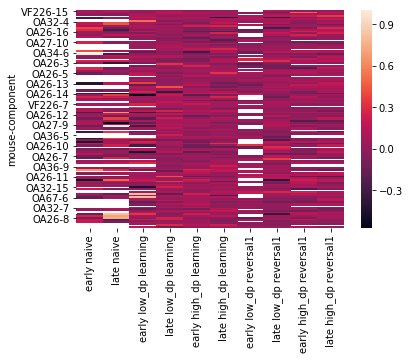

In [276]:
test_plot = test.reset_index().set_index(['mouse', 'component'])
test_with_sorter = pd.concat([sorter.to_frame(), test_plot], axis=1)
sns.heatmap(test_with_sorter.drop(columns=['cue', 'total_model_devex_test']).iloc[test_with_sorter['total_model_devex_test'],:])

test_plot2 = test2.reset_index().set_index(['mouse', 'component'])
test_with_sorter2 = pd.concat([sorter.to_frame(), test_plot2], axis=1)
sns.heatmap(test_with_sorter.drop(columns=['cue', 'total_model_devex_test']).iloc[test_with_sorter['total_model_devex_test'],:])

In [212]:
new_linear.reorder_levels([0, 1, 3, 2]).reindex(labels=col_order, level=2).head()

th_mod
mouse component stage                  cue                   
OA26  3         early naive            initial_plus -0.093295
                late low_dp learning   initial_plus -0.085363
                early high_dp learning initial_plus -0.064836
                late high_dp learning  initial_plus  0.000000
                late low_dp reversal1  initial_plus -0.067145

Mice hashed: compilation
cascade.paths: Assuming default pars: cs: '', warp: '', trace_type: zscore_day


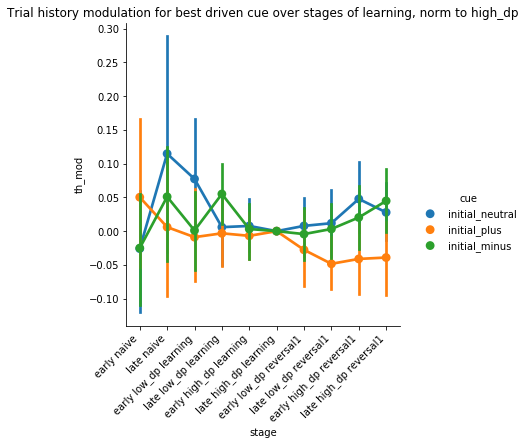

In [242]:
sns.catplot(x='stage', y='th_mod', hue='cue', data=new_linear.reset_index(), kind='point')
plt.xticks(rotation=45, ha='right')
plt.title('Trial history modulation for best driven cue over stages of learning, norm to high_dp')

save_folder = cas.paths.save_dir_groupmouse(
        mice,
        'trial history modulation from components',
        method='ncp_hals',
        nan_thresh=0.85,
        score_threshold=0.95,
        pars=None,
        words=words,
        rank_num=rank_num,
        grouping='group',
        group_pars={'group_by': 'all3'})
save_path = os.path.join(save_folder, 'TH_mod_{}_norm_to_high_dp.png'.format(stage_type))
plt.savefig(save_path, bbox_inches='tight')

# compare to temporal factors and GLM filters

In [97]:
# load GLM results to use for filtering components.

save_folder = cas.paths.save_dir_groupmouse(
        mice,
        'cvGLM trial history 9ori analysis',
        method='ncp_hals',
        nan_thresh=0.85,
        score_threshold=0.95,
        pars=None,
        words=words,
        rank_num=rank_num,
        grouping='group',
        group_pars={'group_by': 'all3'})
all_mddev_df = pd.read_pickle(os.path.join(save_folder, 'cvGLM_delta_deviance_df.npy'))
all_mfdev_df = pd.read_pickle(os.path.join(save_folder, 'cvGLM_fractional_deviance_df.npy'))
all_mdev_df = pd.read_pickle(os.path.join(save_folder, 'cvGLM_model_performance_df.npy'))


Mice hashed: compilation
cascade.paths: Assuming default pars: cs: '', warp: '', trace_type: zscore_day


In [100]:
# load GLM results to use for filtering components.

tempo_dfs = cas.df.load_tempfac_dfs(mice=mice, rank=18, words=words)

Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.


In [286]:
sorter = all_mdev_df['total_model_devex_test'].argsort()
test_with_sorter.head()

total_model_devex_test              cue  early naive  \
mouse component                                                         
OA26  1                             122  initial_neutral     0.174476   
      2                              69  initial_neutral     0.149570   
      3                              92     initial_plus     0.006181   
      4                              40     initial_plus     0.076774   
      5                              35     initial_plus    -0.136982   

                 late naive  early low_dp learning  late low_dp learning  \
mouse component                                                            
OA26  1           -0.268014               0.202835              0.240881   
      2           -0.570481              -0.163431              0.085644   
      3           -0.369629              -0.076911              0.014112   
      4            0.186472               0.065562              0.149004   
      5           -0.020613               0.137710             -0.062273   

                 early high_dp learning  late high_dp learning  \
mouse component                                                  
OA26  1                       -0.006888              -0.063619   
      2                        0.040284              -0.071885   
      3                        0.034640               0.099476   
      4                        0.044976               0.080926   
      5                        0.012261               0.335745   

                 early low_dp reversal1  late low_dp reversal1  \
mouse component                                                  
OA26  1                        0.065941               0.083032   
      2                       -0.067867               0.115532   
      3                        0.084212               0.032331   
      4                        0.006533               0.072443   
      5                        0.067407               0.140308   

                 early high_dp reversal1  late high_dp reversal1  
mouse component                                                   
OA26  1                         0.158325                0.001502  
      2                        -0.034897               -0.071763  
      3                         0.090366               -0.021011  
      4                         0.054988                0.047728  
      5                         0.118727               -0.000595

In [295]:
test_with_sorter['total_model_devex_test'].values[sorter]

array([125,  88, 114,  41,  21,  55,  97,   2,  40,  47,  43,  54,  92,
       106,   8,  82,   4,  59,  28,  89,  33,  62,  24, 115,  67,  27,
        49,  68,  50,  73, 108,  30,  32,  95,  26,  84, 103,  63, 113,
        98,  64,  11, 102,  31,  36,  66,   7,  65, 101,  37, 118,  78,
       120,  85,  60,  48,  90,  61,   5,  93,  12,  70,   1, 121,  16,
        74,  18, 122,  71,  14,  72,  51,  35,  13, 124, 104, 107, 111,
        15,  83,  91,  29,  57, 110,  25, 105, 116,  81,  52,  58,  42,
        96,  56, 123,  45, 119,  17,  20,  22,   9,  44,  69,   3,  75,
         0,  79,  94,  38,  23,   6, 100,  99,  19,  46, 117, 112, 109,
        80,  87,  86,  39,  53,  76,  34,  10,  77], dtype=int64)

In [294]:
sorter.values

array([ 27,  55,  54,  53,  85,  19,  59,  30,   3, 125,  71,  20,   2,
        74,  64, 113,  36,  24, 122,  69,  92,  40,  35,  57,  39,  18,
        44, 117, 102,  17,  15,  25,  94, 108,  66,  73,  80, 105,  33,
        87,  32,  60,  10, 119,  34,  16, 120, 116,  50, 109,  75,  63,
       100,  22,  95,  37,  81,  45,  46,  82,  42, 123,  65,  68,  99,
        31,   7,   0,  28,  70,  86,  47,   4,  48,  83,  67,  62,  58,
        12,  38,  49,  61,   5,  51,  13,  91, 101, 110,  56,  41, 114,
        88,  52, 115, 111,  97,  11,  29, 107,  78,   8,   1,  26, 104,
       121,  89,  14,  43,  76,  84, 106, 118,  23, 112,   9,  77, 103,
        90,  93, 124,   6,  21,  72,  98,  96,  79], dtype=int64)

In [290]:
test_plot = test.reset_index().set_index(['mouse', 'component'])
test_with_sorter = pd.concat([sorter.to_frame(), test_plot], axis=1)
only_th_mod = test_with_sorter #.drop(columns=['cue', 'total_model_devex_test'])
sorted_th_mod = only_th_mod.iloc[test_with_sorter['total_model_devex_test'],:]
sorted_th_mod.head()

,,total_model_devex_test,cue,early naive,late naive,early low_dp learning,late low_dp learning,early high_dp learning,late high_dp learning,early low_dp reversal1,late low_dp reversal1,early high_dp reversal1,late high_dp reversal1
mouse,component,,,,,,,,,,,,
VF226,15,28,initial_minus,0.061540,0.121775,0.041765,0.101415,-0.005027,0.032436,NaN,0.106478,0.016374,0.033861
OA34,16,89,initial_minus,NaN,NaN,-0.036448,0.191482,0.125215,0.094463,-0.011340,-0.101764,0.494889,0.157148
OA67,3,33,initial_minus,-0.011131,-0.046022,0.097106,0.089205,0.102463,0.036568,NaN,0.069537,0.098797,0.094044
OA32,5,62,initial_minus,NaN,NaN,0.109246,-0.007840,0.034409,0.075911,0.082376,0.178330,0.212943,0.352079
OA27,18,24,initial_neutral,-0.291158,-0.006939,0.195649,0.096469,0.079113,-0.386689,NaN,-0.346749,-0.015232,0.013244


In [375]:
rows_bool.head()

mouse  component
OA26   10           False
VF226  2            False
       1            False
OA67   18           False
OA32   14           False
Name: total_model_devex_test, dtype: bool

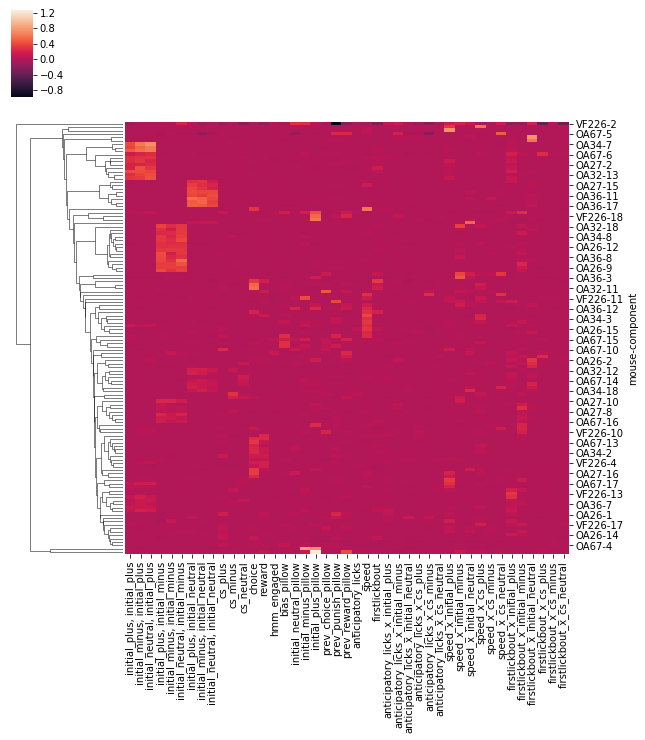

In [393]:
rows_bool = all_mdev_df['total_model_devex_test'].iloc[sorter].gt(.2).values
g = sns.clustermap(all_mfdev_df.iloc[sorter, :], col_cluster=False)
# g = sns.clustermap(all_mfdev_df.iloc[sorter, :].iloc[rows_bool, :], vmin=0, vmax=0.5, method='ward', col_cluster=False)
# g = sns.clustermap(all_mfdev_df.iloc[sorter, :].iloc[rows_bool, :], vmin=0, vmax=0.5, metric='cosine', col_cluster=False)
new_sort = g.dendrogram_row.reordered_ind

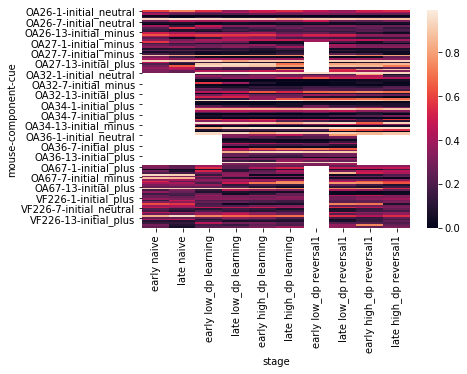

In [440]:
sns.heatmap(test6)

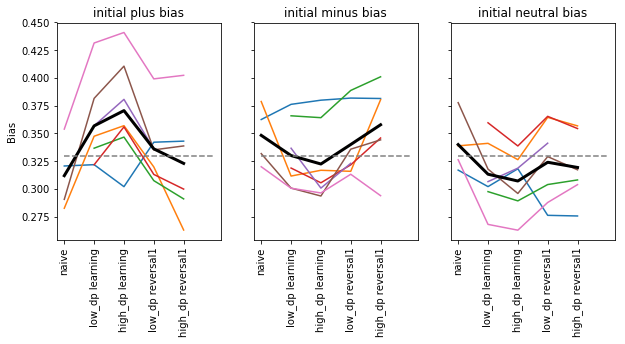

In [466]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10,4))
axes[0].plot(test4.groupby('mouse').mean().values.T)
axes[0].plot(test4.mean(axis=0).values.T, 'k', linewidth=3)
axes[0].plot([0, len(test5.columns)], [0.33, 0.33], '--', color='gray')
axes[0].set_title('initial plus bias')
axes[0].set_ylabel('Bias')
axes[0].set_xticks(np.arange(len(test5.columns)));
axes[0].set_xticklabels(test5.columns, rotation=90, ha='center');

axes[1].plot(test5.groupby('mouse').mean().values.T)
axes[1].plot(test5.mean(axis=0).values.T, 'k', linewidth=3)
axes[1].plot([0, len(test5.columns)], [0.33, 0.33], '--', color='gray')
axes[1].set_title('initial minus bias')
axes[1].set_xticks(np.arange(len(test5.columns)));
axes[1].set_xticklabels(test5.columns, rotation=90, ha='center');

axes[2].plot(test6.groupby('mouse').mean().values.T)
axes[2].plot(test6.mean(axis=0).values.T, 'k', linewidth=3)
axes[2].plot([0, len(test5.columns)], [0.33, 0.33], '--', color='gray')
axes[2].set_title('initial neutral bias')
axes[2].set_xticks(np.arange(len(test5.columns)));
axes[2].set_xticklabels(test5.columns, rotation=90, ha='center');

In [331]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, center="dark", as_cmap=True)

(72, 93)
(54, 93)
Mice hashed: compilation
cascade.paths: Assuming default pars: cs: '', warp: '', trace_type: zscore_day


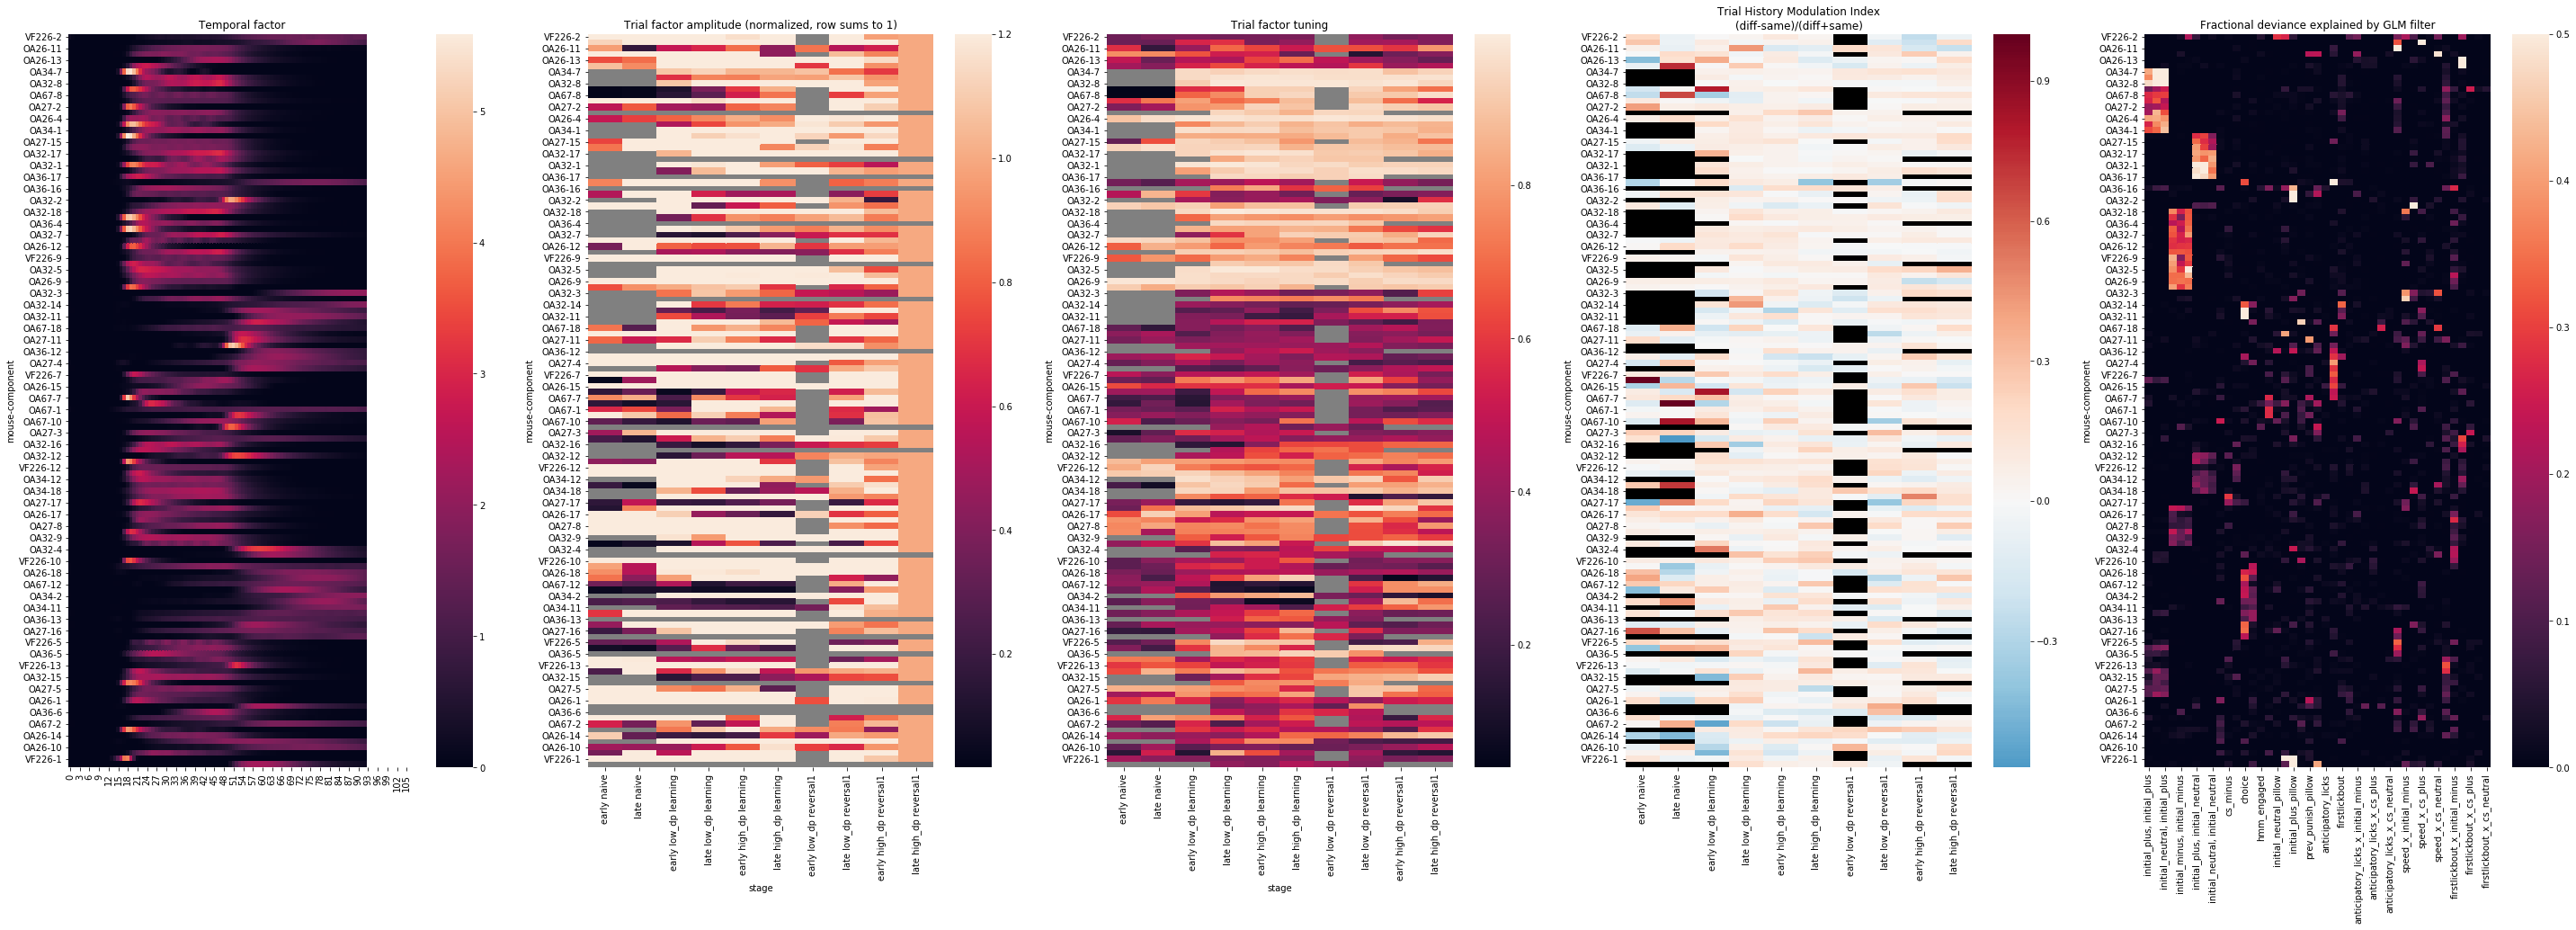

In [413]:
fig, ax = plt.subplots(1, 5, figsize=(50,15))
test_plot = test.reset_index().set_index(['mouse', 'component'])
test_plot_amp = test2.reset_index().set_index(['mouse', 'component'])
test_plot_tun = test3.reset_index().set_index(['mouse', 'component'])

sorter = all_mdev_df['total_model_devex_test'].argsort()

test_with_sorter = pd.concat([all_mdev_df['total_model_devex_test'].to_frame(), test_plot], axis=1) #sort on this
sorter2 = test_with_sorter['total_model_devex_test'].argsort()
only_th_mod = test_with_sorter.drop(columns=['cue', 'total_model_devex_test'])
sorted_th_mod = only_th_mod.iloc[sorter2,:]

test_plot_amp_only = test_plot_amp.drop(columns=['cue'])
sorted_amp = test_plot_amp_only.iloc[sorter2, :]
# sorted_amp = sorted_amp.transform(lambda x: x.divide(x.max(axis=1), axis=1)) # normalize
# for i in range(len(sorted_amp.columns)):
#     sorted_amp.iloc[:,i] = sorted_amp.values[:, i]/sorted_amp.sum(axis=1).values

for i in range(len(sorted_amp.columns)):
    sorted_amp.iloc[:,i] = sorted_amp.values[:, i]/sorted_amp['late high_dp reversal1'].values
    
test_plot_tun_only = test_plot_tun.drop(columns=['cue'])
sorted_tun = test_plot_tun_only.iloc[sorter2, :]

sns.heatmap(all_mfdev_df.iloc[sorter, :].iloc[new_sort,:], ax=ax[4], vmin=0, vmax=0.5)
sns.heatmap(sorted_th_mod.iloc[new_sort,:], ax=ax[3], cmap='RdBu_r', center=0)
sns.heatmap(sorted_tun.iloc[new_sort,:], ax=ax[2])
sns.heatmap(sorted_amp.iloc[new_sort,:], ax=ax[1], vmax=1.2)
sns.heatmap(cas.df._stim_interp_2s(tempo_dfs).iloc[sorter,:].iloc[new_sort,:], ax=ax[0])
ax[0].set_title('Temporal factor')
ax[1].set_title('Trial factor amplitude (normalized, row sums to 1)')
ax[2].set_title('Trial factor tuning')
ax[3].set_title('Trial History Modulation Index\n(diff-same)/(diff+same)');
ax[4].set_title('Fractional deviance explained by GLM filter')


ax[1].set_facecolor('gray')
ax[2].set_facecolor('gray')
ax[3].set_facecolor('black')
# plt.suptitle('Temporal factors and ')


save_folder = cas.paths.save_dir_groupmouse(
        mice,
        'trial history modulation from components',
        method='ncp_hals',
        nan_thresh=0.85,
        score_threshold=0.95,
        pars=None,
        words=words,
        rank_num=rank_num,
        grouping='group',
        group_pars={'group_by': 'all3'})

fig.savefig(os.path.join(save_folder, 'tempfac_vs_THmod_by_{}_heatmaps_with_heirclus_wamp_wtun_v3.png'.format(stage_type)), bbox_inches='tight')

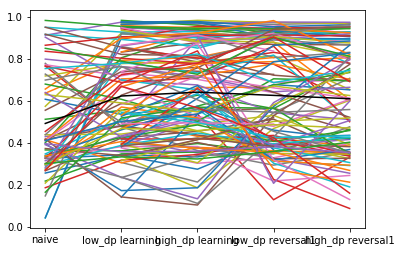

In [404]:
plt.plot(sorted_tun.iloc[new_sort,:].T);
plt.plot(sorted_tun.mean(axis=0).T, '-k');

(72, 93)
(54, 93)
Mice hashed: compilation
cascade.paths: Assuming default pars: cs: '', warp: '', trace_type: zscore_day


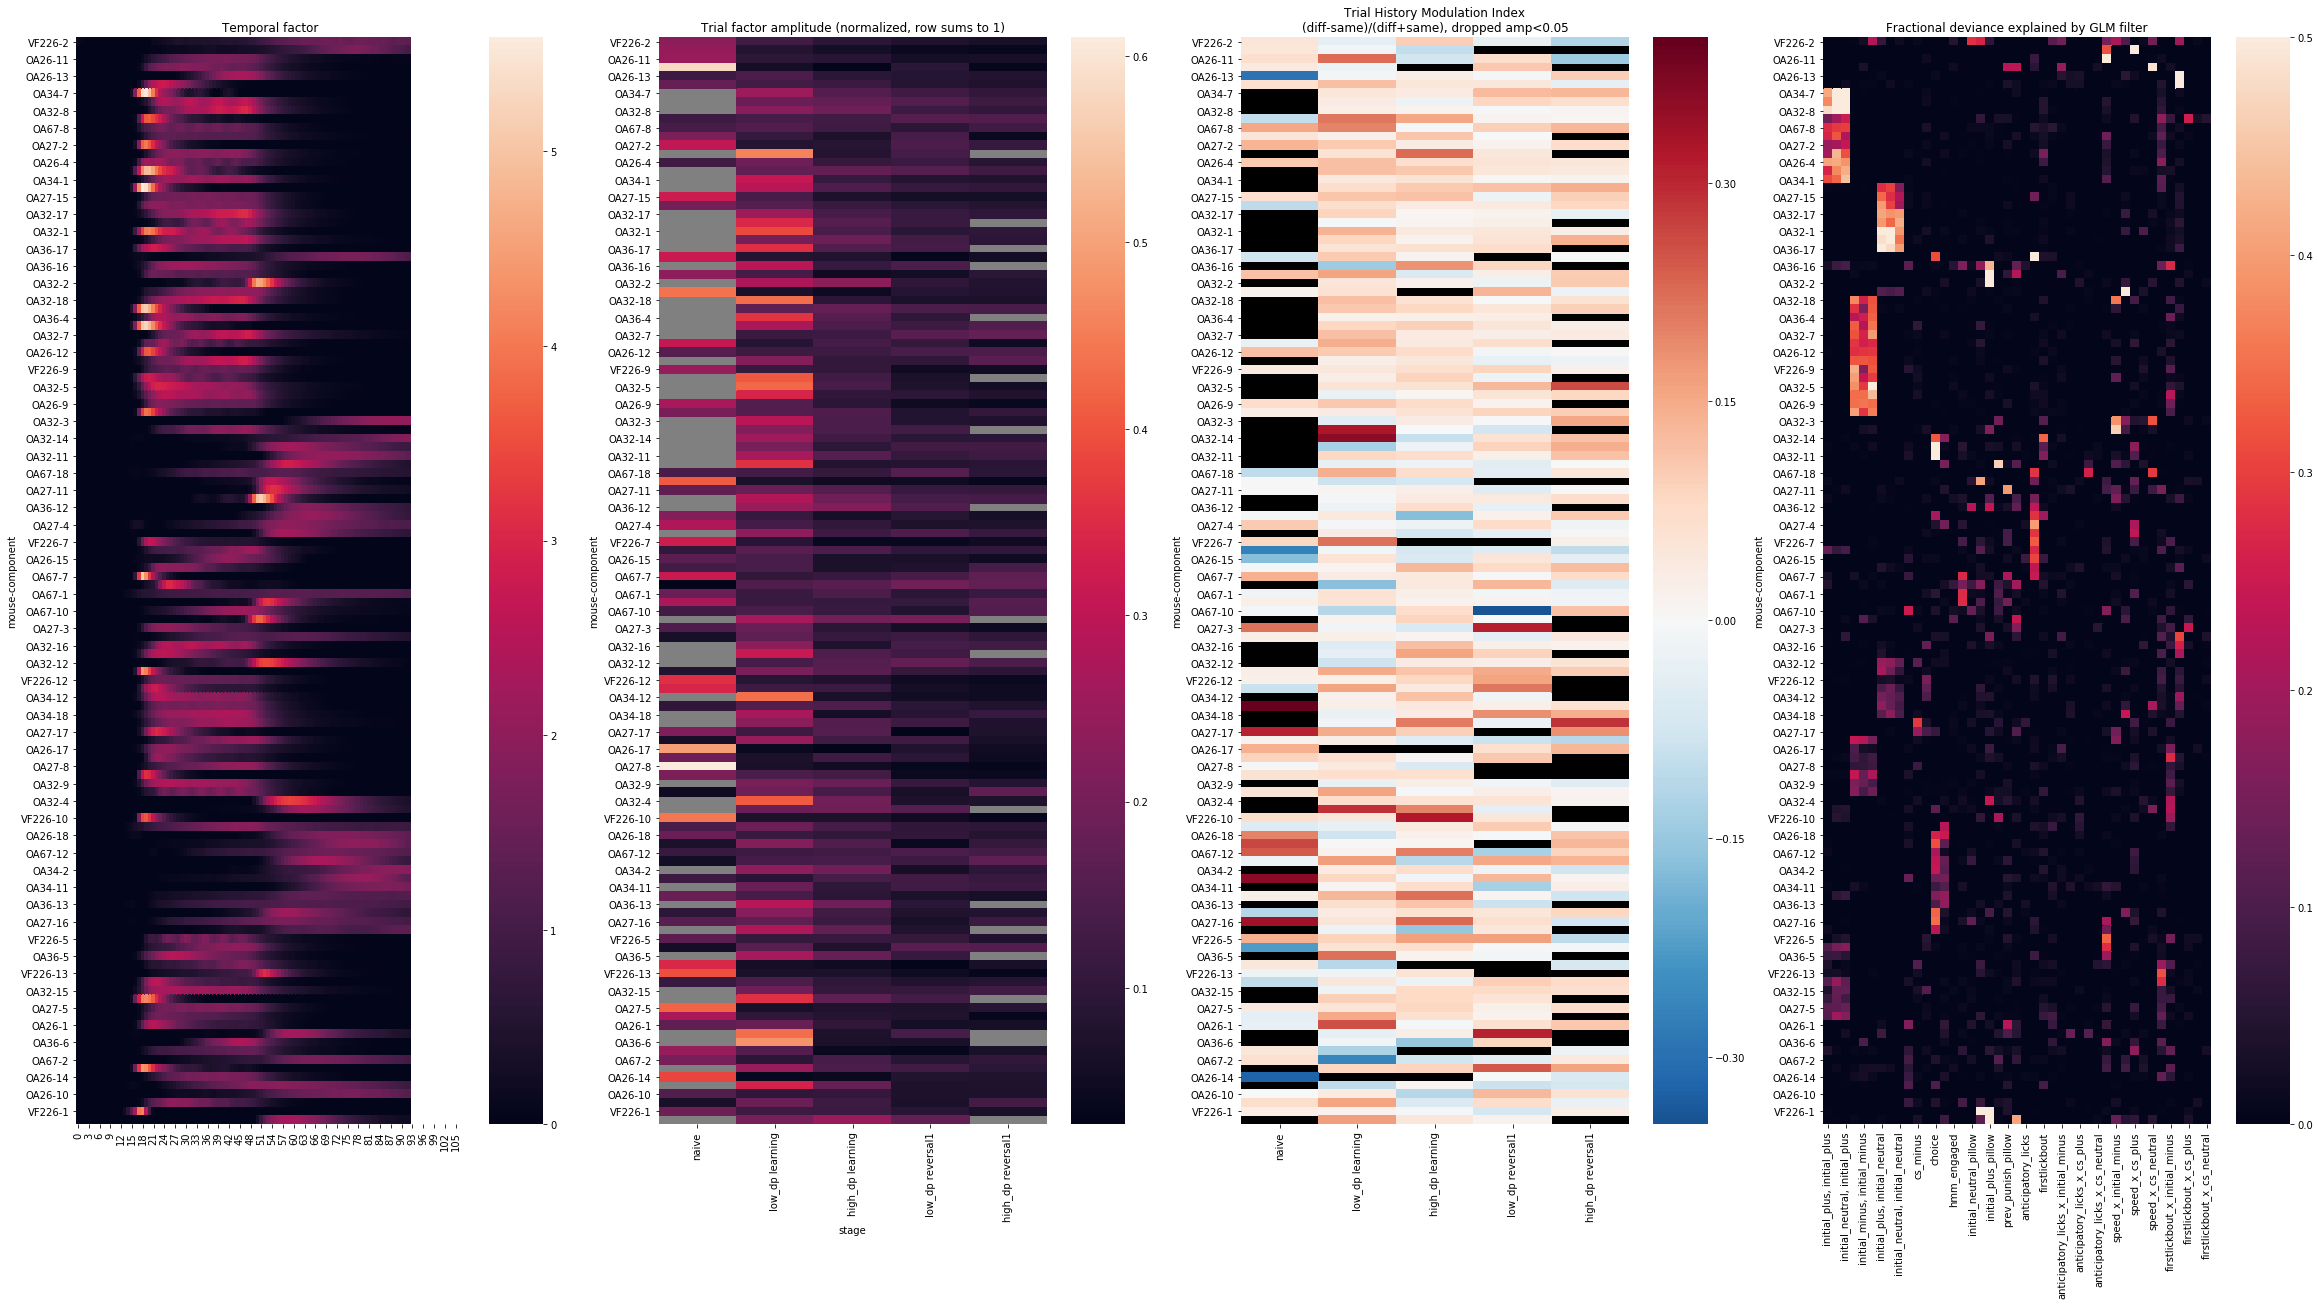

In [363]:
fig, ax = plt.subplots(1, 4, figsize=(40,20))
test_plot = test.reset_index().set_index(['mouse', 'component'])
test_plot_amp = test2.reset_index().set_index(['mouse', 'component'])

sorter = all_mdev_df['total_model_devex_test'].argsort()

test_with_sorter = pd.concat([all_mdev_df['total_model_devex_test'].to_frame(), test_plot], axis=1) #sort on this
sorter2 = test_with_sorter['total_model_devex_test'].argsort()
only_th_mod = test_with_sorter.drop(columns=['cue', 'total_model_devex_test'])
sorted_th_mod = only_th_mod.iloc[sorter2,:]

test_plot_amp_only = test_plot_amp.drop(columns=['cue'])
sorted_amp = test_plot_amp_only.iloc[sorter2, :]
# sorted_amp = sorted_amp.transform(lambda x: x.divide(x.max(axis=1), axis=1)) # normalize
for i in range(len(sorted_amp.columns)):
    sorted_amp.iloc[:,i] = sorted_amp.values[:, i]/sorted_amp.sum(axis=1).values


bool_mask = sorted_amp.iloc[new_sort,:].gt(0.05).values
with_mask_th_mod = sorted_th_mod.iloc[new_sort,:]
with_mask_th_mod.iloc[~bool_mask] = np.nan

sns.heatmap(all_mfdev_df.iloc[sorter, :].iloc[new_sort,:], ax=ax[3], vmin=0, vmax=0.5)
sns.heatmap(with_mask_th_mod, ax=ax[2], cmap='RdBu_r', center=0)
# sns.heatmap(sorted_th_mod.iloc[new_sort,:], ax=ax[2], cmap='RdBu_r', center=0)
sns.heatmap(sorted_amp.iloc[new_sort,:], ax=ax[1])
sns.heatmap(cas.df._stim_interp_2s(tempo_dfs).iloc[sorter,:].iloc[new_sort,:], ax=ax[0])
ax[0].set_title('Temporal factor')
ax[1].set_title('Trial factor amplitude (normalized, row sums to 1)')
ax[3].set_title('Fractional deviance explained by GLM filter')
ax[2].set_title('Trial History Modulation Index\n(diff-same)/(diff+same), dropped amp<0.05');

ax[1].set_facecolor('gray')
ax[2].set_facecolor('black')
# plt.suptitle('Temporal factors and ')


save_folder = cas.paths.save_dir_groupmouse(
        mice,
        'trial history modulation from components',
        method='ncp_hals',
        nan_thresh=0.85,
        score_threshold=0.95,
        pars=None,
        words=words,
        rank_num=rank_num,
        grouping='group',
        group_pars={'group_by': 'all3'})

fig.savefig(os.path.join(save_folder, 'tempfac_vs_THmod_by_{}_heatmaps_with_heirclus_wamp_wdrop.png'.format(stage_type)), bbox_inches='tight')